<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-149/blob/main/CyAD_ActSem6_A01793468.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maestría en Inteligencia Artificial Aplicada

Curso: Ciencia y Analítica de Datos

Tecnológico de Monterrey

Prof Dra. María de la Paz Rico

Nombre del estudiante: Carlos Gustavo Lopez

Matrícula: A01793468

Actividad Semanal -- 6, visualización

In [1]:
# módulos, librerías y paquetes requeridos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from warnings import filterwarnings
from matplotlib.axes import Subplot

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler


1. Descarga los datos

In [2]:
#carga de datos. dado que la primera columna es el ID, debe quitarse
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

df = pd.read_csv(path, delimiter = ',', index_col = 0)
df.index.name = None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Reemplazamos los nombres de las columnas con bsae en la descripción de los atributos

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [3]:
#Cambiamos los nombres de las columnas por unos mas descriptivos
df.columns = ['amount_credit', 'gender', 'education', 'marital_status', 'age', 
              'repay_sep_2005', 'repay_aug_2005', 'repay_jul_2005', 'repay_jun_2005', 'repay_may_2005', 'repay_apr_2005',
              'bill_sep_2005', 'bill_aug_2005', 'bill_jul_2005', 'bill_jun_2005', 'bill_may_2005', 'bill_apr_2005',
              'pay_sep_2005', 'pay_aug_2005', 'pay_jul_2005', 'pay_jun_2005', 'pay_may_2005', 'pay_apr_2005', 'Y']

df

,amount_credit,gender,education,marital_status,age,repay_sep_2005,repay_aug_2005,repay_jul_2005,repay_jun_2005,repay_may_2005,...,bill_jun_2005,bill_may_2005,bill_apr_2005,pay_sep_2005,pay_aug_2005,pay_jul_2005,pay_jun_2005,pay_may_2005,pay_apr_2005,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [4]:
print ('---SHAPE---')
print (df.shape)
print ('-----------')

print ('---COLUMNS---')
print (df.columns)
print ('-----------')

print ('---HEAD---')
print (df.head)
print ('-----------')

print ('---DTYPES---')
print (df.dtypes)
print ('-----------')

print ('---INFO---')
print (df.info)
print ('-----------')

print ('---ISNA---')
print (df.isna().sum()) # retorna booleano indicando si el valor es NA
print ('-----------')

print ('---TOTAL DE NULOS---')
print (str(df.isna().sum().sum()))
print ('-----------')


---SHAPE---
(30000, 24)
-----------
---COLUMNS---
Index(['amount_credit', 'gender', 'education', 'marital_status', 'age',
       'repay_sep_2005', 'repay_aug_2005', 'repay_jul_2005', 'repay_jun_2005',
       'repay_may_2005', 'repay_apr_2005', 'bill_sep_2005', 'bill_aug_2005',
       'bill_jul_2005', 'bill_jun_2005', 'bill_may_2005', 'bill_apr_2005',
       'pay_sep_2005', 'pay_aug_2005', 'pay_jul_2005', 'pay_jun_2005',
       'pay_may_2005', 'pay_apr_2005', 'Y'],
      dtype='object')
-----------
---HEAD---
<bound method NDFrame.head of        amount_credit  gender  education  marital_status   age  repay_sep_2005  \
1              20000     2.0        2.0             1.0  24.0             2.0   
2             120000     2.0        2.0             2.0  26.0            -1.0   
3              90000     2.0        2.0             2.0  34.0             0.0   
4              50000     2.0        2.0             1.0  37.0             0.0   
5              50000     1.0        2.0            

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [5]:
#Sacamos una copia de la BD para alterar los datos
ndf = df.copy()

# Se decide rellenar datos nulos con datos de siguiente fila en columna Age (dado que solo tenemos 5/30.000 datos nulos)
ndf["age"].ffill(inplace=True)

In [6]:
print ('---ISNA---')
print (ndf.isna().sum()) # retorna booleano indicando si el valor es NA
print ('-----------')

---ISNA---
amount_credit      0
gender             1
education          2
marital_status     2
age                0
repay_sep_2005     3
repay_aug_2005     5
repay_jul_2005     7
repay_jun_2005     9
repay_may_2005    16
repay_apr_2005    14
bill_sep_2005     11
bill_aug_2005     11
bill_jul_2005     13
bill_jun_2005     15
bill_may_2005     17
bill_apr_2005     10
pay_sep_2005       8
pay_aug_2005       9
pay_jul_2005       8
pay_jun_2005      11
pay_may_2005      11
pay_apr_2005       5
Y                  3
dtype: int64
-----------


In [7]:
# Rellenamos los datos nulos con promedio de columnas Gender, Education, Marital
ndf.gender.fillna(ndf.gender.mean(), inplace = True)
ndf.education.fillna(ndf.education.mean(), inplace = True)
ndf.marital_status.fillna(ndf.marital_status.mean(), inplace = True)

print ('---TOTAL DE NULOS---')
print (str(ndf.isna().sum().sum()))
print ('-----------')

---TOTAL DE NULOS---
186
-----------


In [8]:
# Finalmente eliminamos las filas con valores de pagos nulos, así como las Y en nulo, ya que es lo más conveniente para no alterar el modelo y dado que son muy pocos comparado con el total de registros de la base
ndf.dropna(inplace = True)

print ('---TOTAL DE NULOS---')
print (str(ndf.isna().sum().sum()))
print ('-----------')

---TOTAL DE NULOS---
0
-----------


4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [9]:
ndf.describe()

,amount_credit,gender,education,marital_status,age,repay_sep_2005,repay_aug_2005,repay_jul_2005,repay_jun_2005,repay_may_2005,...,bill_jun_2005,bill_may_2005,bill_apr_2005,pay_sep_2005,pay_aug_2005,pay_jul_2005,pay_jun_2005,pay_may_2005,pay_apr_2005,Y
count,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,...,29961.000000,29961.000000,29961.000000,29961.000000,2.996100e+04,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000
mean,167570.831414,1.604052,1.853042,1.551784,35.483762,-0.017156,-0.134041,-0.166783,-0.221121,-0.266847,...,43279.742465,40329.126631,38888.917025,5666.635693,5.926206e+03,5228.981109,4830.090851,4802.842629,5220.932879,0.221154
std,129747.726791,0.489062,0.790463,0.522009,9.214276,1.123947,1.197122,1.195977,1.168370,1.132296,...,64363.745973,60825.064775,59580.737846,16572.172269,2.305530e+04,17617.072002,15675.706098,15287.267034,17788.331077,0.415031
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.000000,1762.000000,1256.000000,1000.000000,8.350000e+02,390.000000,296.000000,253.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19038.000000,18104.000000,17067.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54558.000000,50222.000000,49235.000000,5007.000000,5.000000e+03,4512.000000,4015.000000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


La media (mean) indica el valor promedio de cada campo. En el dataset, resalta que:
 - El monto promedio de crédito es de USD 167.570
 - La edad promedio de los clientes es de 36 años
 - El extracto de la cuenta (columnas bill) tiene un aproximado promedio de USD 40.000
 - El valor promedio pagado (columnas pay) es de aproximadamente USD 4.800

 La desviación estandar (std) indica que tan alejados o dispersos están los datos del promedio. Resalta la alta desviación del monto de crédito de casi 130.000, la cual se evidencia al ver la gran diferencia entre el min de 10.000 y el máximo de 1.000.000. Una desviación similarmente grande se evidencia en todas todos los atributos relacionados con pagos. 
 De forma opuesta, podemos apreciar que la desviación de la edad es de tan solo 9, lo cual concuerda con una mediana de 34, lo que muestra que la edad tendría una distribución cerana a la normal.

 La mediana corresponde al valor de la mitad (50%) ordenando todos los valores de menor a mayor. Este indicador es de gran importancia porque nos da luces importantes acerca de como están distribuidos los datos. 
 En el dataset se puede apreciar que, por ejemplo, si bien el promedio de montos de crédito es de usd 167.000, la mediana es de 140.000, lo que sugiere que hay créditos de montos atípicamente altos. En realidad el monto es más probable que ronde alrededor de los 140.000.

5. Realiza el conteo de las variables categóricas

In [10]:
X = ndf[['amount_credit', 'gender', 'education', 'marital_status', 'age', 
              'repay_sep_2005', 'repay_aug_2005', 'repay_jul_2005', 'repay_jun_2005', 'repay_may_2005', 'repay_apr_2005',
              'bill_sep_2005', 'bill_aug_2005', 'bill_jul_2005', 'bill_jun_2005', 'bill_may_2005', 'bill_apr_2005',
              'pay_sep_2005', 'pay_aug_2005', 'pay_jul_2005', 'pay_jun_2005', 'pay_may_2005', 'pay_apr_2005']]
       
y = ndf[['Y']]


In [11]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29961 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_credit   29961 non-null  int64  
 1   gender          29961 non-null  float64
 2   education       29961 non-null  float64
 3   marital_status  29961 non-null  float64
 4   age             29961 non-null  float64
 5   repay_sep_2005  29961 non-null  float64
 6   repay_aug_2005  29961 non-null  float64
 7   repay_jul_2005  29961 non-null  float64
 8   repay_jun_2005  29961 non-null  float64
 9   repay_may_2005  29961 non-null  float64
 10  repay_apr_2005  29961 non-null  float64
 11  bill_sep_2005   29961 non-null  float64
 12  bill_aug_2005   29961 non-null  float64
 13  bill_jul_2005   29961 non-null  float64
 14  bill_jun_2005   29961 non-null  float64
 15  bill_may_2005   29961 non-null  float64
 16  bill_apr_2005   29961 non-null  float64
 17  pay_sep_2005    29961 non-null 

In [12]:
# Definimos las columnas que corresponden a cada tipo de dato

#Se establecen como variables categoricas aquellas que tienen un numero finito de valores posibles
names_pipeline_cat, names_pipeline_cat_index = ['education', 'marital_status'], [14,15] 

#Se establecen como variables numericas aquellas que contienen un numero muy grande de valores enteros posibles 
names_pipeline_num, names_pipeline_num_index = ['amount_credit', 'age', 'bill_sep_2005', 'bill_aug_2005', 'bill_jul_2005', 'bill_jun_2005', 'bill_may_2005', 'bill_apr_2005',
              'pay_sep_2005', 'pay_aug_2005', 'pay_jul_2005', 'pay_jun_2005', 'pay_may_2005', 'pay_apr_2005'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

#Se establecen como variables binarias aquellas que solo tienen dos valores posibles
names_pipeline_bin, names_pipeline_bin_index = ['gender'], [22]

#Se establecen como variables ordinales aquellas variables que son categoricas y que tienen un orden logico entre sus valores. 
#Por ejemplo, la variable employment duration tiene valores entre 1 y 5, donde 1 es desempleado, 2 empleado hace menos de un año y asi en adeltante
# Estas variables cuentan con valores que tienen una correlación con la variable a la que representan 
# (A mayor valor de la variable ordinal, mayor impacto tiene esto en la representación de la variable a la que esta representando).

names_pipeline_ord, names_pipeline_ord_index = ['repay_sep_2005', 'repay_aug_2005', 'repay_jul_2005', 'repay_jun_2005', 'repay_may_2005', 'repay_apr_2005'], [16,17,18, 19, 20, 21]

#Se unen tanto categoricas como binarias para transformación futura

names_pipeline_cat_bin = names_pipeline_cat + names_pipeline_bin

names_pipeline_cat_bin_index = names_pipeline_cat_index + names_pipeline_bin_index

In [13]:
# Definimos las Pipelines

# Transformaciones a factores categóricos y binarios de entrada: remplazo por moda y aplicación de OneHotEncoder para crear columnas Dummies
pipeline_cat_bin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                     ('OneHotE', OneHotEncoder(handle_unknown = 'ignore'))])

# Transformaciones a factores numéricos de entrada: remplazo con promedio y escalación gaussiana
pipeline_num = Pipeline(steps = [('impMedian', SimpleImputer(strategy='median')),
                                 ('escalaNum', StandardScaler())])

# Transformaciones a factores ordinales de entrada: remplazo con moda y escalación gaussiana
pipeline_ord = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])


# Aplicamos las transformaciones a las columnas correspondientes con ColumnTransformer

transformaciones = ColumnTransformer( transformers = [
                                                      ('numimp', pipeline_num, names_pipeline_num),
                                                      ('catbimp', pipeline_cat_bin, names_pipeline_cat_bin),
                                                      ('ordimp', pipeline_ord, names_pipeline_ord)],
                                                      remainder='passthrough')

In [14]:
pipeline_salida = Pipeline(steps=[('impMedian', SimpleImputer(strategy='median'))])
names_pipeline_salida = ['Y']

transformacionessalida = ColumnTransformer( transformers = [('outimp', pipeline_salida, [0])], 
                                           remainder = 'passthrough')

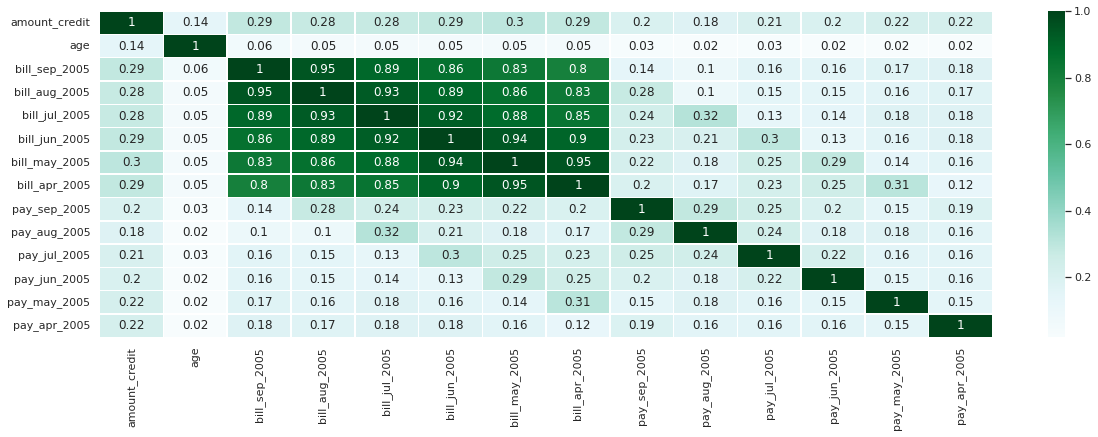

In [15]:
#Identificamos la correlación entre parejas de todas las columnas de las variables numericas y binarias del dataframe

#Establecemos el tamaño de la tabla
sns.set(rc={'figure.figsize':(20,6)}) 

#Xc es el subconjunto de X con los atributos numericos y binarios
'''Xc = X[['amount_credit', 'age','gender', 'bill_sep_2005', 'bill_aug_2005', 'bill_jul_2005', 'bill_jun_2005', 'bill_may_2005', 'bill_apr_2005',
              'pay_sep_2005', 'pay_aug_2005', 'pay_jul_2005', 'pay_jun_2005', 'pay_may_2005', 'pay_apr_2005']]'''

Xc = X[['amount_credit', 'age','bill_sep_2005', 'bill_aug_2005', 'bill_jul_2005', 'bill_jun_2005', 'bill_may_2005', 'bill_apr_2005',
              'pay_sep_2005', 'pay_aug_2005', 'pay_jul_2005', 'pay_jun_2005', 'pay_may_2005', 'pay_apr_2005']]


correlation = Xc.corr()
sns.heatmap(round(correlation, 2), annot=True, cmap="BuGn", linewidths=0.5) 

plt.show()

Del análisis de correlación se concluye que hay una alta correlación, como era de esperarse, entre los extractos mensuales (bill) y una relación interesante, aunque menor, entre el monto del crédito y los extractos de las cuentas.

6. Escala los datos, si consideras necesario
 - Nota se realizará el escalado de los datos tras efectuar el PCA (Punto 7).

7. Reduce las dimensiones con PCA, si consideras necesario.

7.1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

7.2. Indica la importancia de las variables en cada componente

In [16]:
pcs = PCA()

pcs.fit(preprocessing.scale(ndf.iloc[:, :].dropna(axis = 0)))

pcs.fit(Xc.iloc[:, :].dropna(axis = 0))

Xc_pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
Xc_pcsSummary = Xc_pcsSummary.transpose()
Xc_pcsSummary.columns = ['PC{}'.format(i) for i in range (1, len(Xc_pcsSummary.columns)+1)]
Xc_pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166584.932182,115830.991372,37255.752340,27746.689828,20697.811580,20277.839617,18522.309951,17039.643443,16293.308975,11615.171993,10413.783806,8786.471700,8198.587237,9.113950e+00
Proportion of variance,0.610553,0.295190,0.030538,0.016938,0.009425,0.009047,0.007548,0.006388,0.005841,0.002968,0.002386,0.001699,0.001479,1.827533e-09
Cumulative proportion,0.610553,0.905743,0.936281,0.953219,0.962644,0.971691,0.979239,0.985628,0.991468,0.994437,0.996823,0.998521,1.000000,1.000000e+00


In [17]:
#Escalamiento de datos
scaler = StandardScaler()
scaled = scaler.fit_transform(Xc)

scaled_Xc = pd.DataFrame(scaled, columns=Xc.columns)

total_var =scaled_Xc.var().sum()
pd.DataFrame({
    "Porcentaje Varianza": (scaled_Xc.var()/ total_var) * 100,
    "Porcentaje Varianza Acumulado": (scaled_Xc.var().cumsum() / total_var) * 100 })

comps_Xc = pd.DataFrame(
  pcs.components_.round(2), # pcs.components nos da los pesos de cada uno de los componentes
  columns = Xc_pcsSummary.columns, #Son 13 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC13
  index = scaled_Xc.columns) #Las filas son 13 también, las cuales hacen referencia a las variables originales comps_df.iloc[:,:7]

comps_Xc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
amount_credit,0.49,0.0,0.39,0.38,0.37,0.35,0.32,0.31,0.03,0.03,0.03,0.02,0.02,0.02
age,0.87,0.0,-0.22,-0.23,-0.22,-0.19,-0.18,-0.17,0.01,0.01,0.01,0.01,0.01,0.02
bill_sep_2005,-0.02,-0.0,-0.55,-0.39,-0.05,0.26,0.43,0.48,0.04,0.16,0.14,0.09,0.06,-0.02
bill_aug_2005,-0.02,-0.0,-0.20,-0.04,0.55,0.08,-0.20,-0.31,0.19,0.67,0.03,-0.04,0.01,0.12
bill_jul_2005,-0.04,-0.0,0.32,0.01,-0.25,-0.37,-0.02,0.23,0.20,0.34,0.31,0.44,0.36,0.29
bill_jun_2005,0.02,0.0,0.00,-0.08,0.30,-0.47,-0.08,0.39,-0.23,0.11,-0.57,0.02,0.21,-0.31
bill_may_2005,-0.00,-0.0,-0.46,0.53,0.03,-0.18,-0.01,0.08,0.61,-0.25,-0.15,0.09,0.06,0.05
bill_apr_2005,0.00,-0.0,0.01,-0.07,0.08,-0.23,0.48,-0.26,-0.08,-0.00,-0.31,0.45,-0.48,0.32
pay_sep_2005,0.01,0.0,0.07,0.10,-0.11,-0.10,0.13,-0.11,0.17,0.23,0.23,0.23,-0.31,-0.81
pay_aug_2005,0.00,-0.0,0.17,0.01,-0.34,-0.14,0.10,0.24,0.28,0.36,-0.20,-0.59,-0.39,0.15


In [18]:
#Asociamos componentes con atributos
comps_Xc.iloc[:,:].idxmax()

PC1               age
PC2      pay_apr_2005
PC3     amount_credit
PC4     bill_may_2005
PC5     bill_aug_2005
PC6     amount_credit
PC7     bill_apr_2005
PC8     bill_sep_2005
PC9     bill_may_2005
PC10    bill_aug_2005
PC11     pay_jul_2005
PC12    bill_apr_2005
PC13    bill_jul_2005
PC14    bill_apr_2005
dtype: object

1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

Se identifica con el análisis PCA que los componentes de mayor variación son:
genero con 61.1% de variación y pay_apr_2005 con 29.5%. Sorprende el hecho que el campo con los valores pagados en abril de 2005 sea el segundo componente importancia, por encima de otros componentes como el monto del crédito.

2. Indica la importancia de las variables en cada componente

Estos dos componentes, age y pago deabril de 2005 contienen el 90.6% de la varianza e todos los componentes.

Identificarlos baja significativamente la dimensionalidad del modelo, de 23 componentes a dos, sacrificando únicamente el 9.4% de la varianza.



Procedemos a graficar la regresión lineal con estos PCS

8. Elabora los histogramas de los atributos para visualizar su distribución

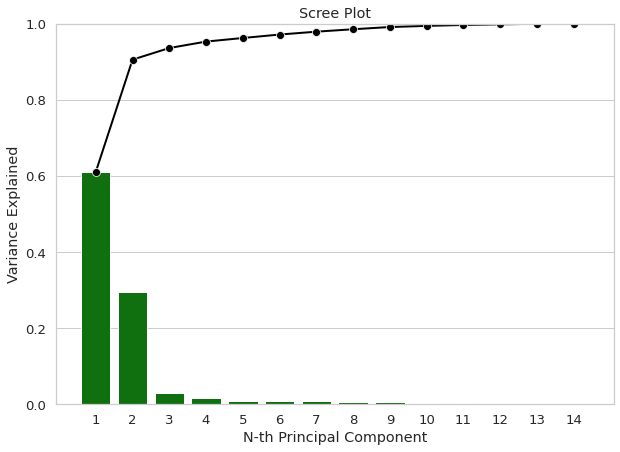

In [19]:
#Graficamos en un diagrama de barras la varianza de los componentes donde se aprecia la varianza acumulada del 90.6% ara los dos PCs.
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'green'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

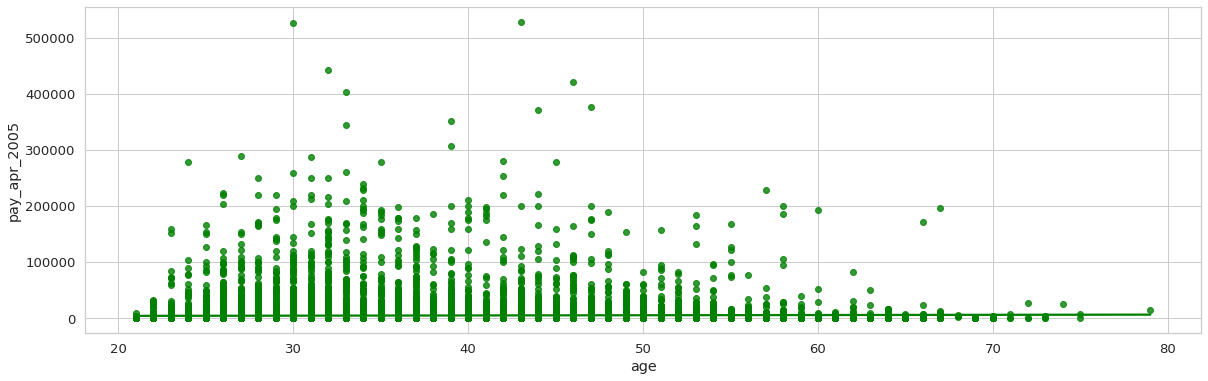

In [20]:
#Usamos regplot para analizar el modelo de regresión

p = sns.regplot(data = Xc,  
                x = Xc.age, 
                y = Xc.pay_apr_2005,
                color = 'green'
               ) 
p


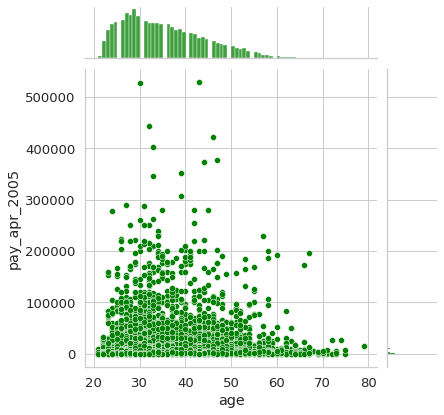

In [21]:
#Otra forma de visualizar la relación entre age y pay_apr_2005 mediante jointplot
sns.jointplot(x ='age',color ='green', y ='pay_apr_2005', data = Xc)

Tras analizar la relación entre la edad del cliente y el monto del pago en abril de 2005, se concluye que entre los 25 y los 30 años es cuando los clientes realizan pagos de cuotas más altas. A partir de los 30 años los montos de pagos empiezan a disminuir paulatinamente.

La distribución de los datos tiene una asimetría positiva.

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


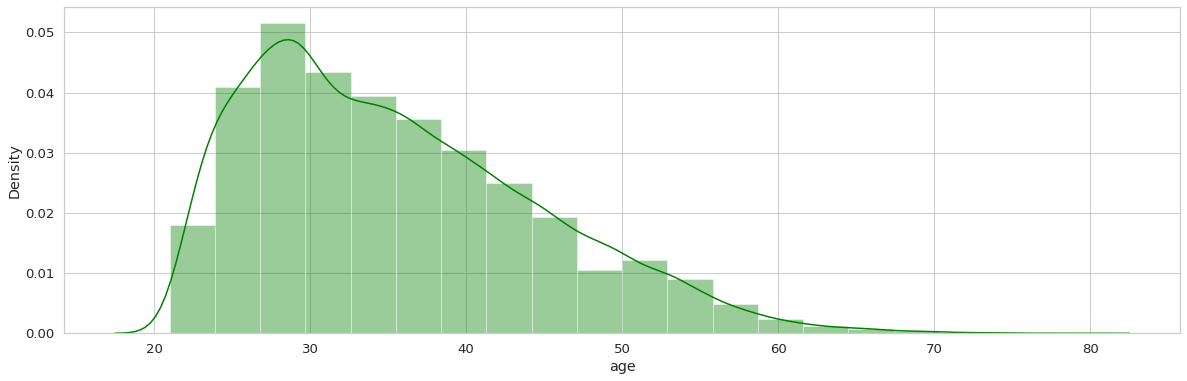

In [22]:
#realizamos un histograma para analizar la distribución de los datos por edades
sns.distplot(Xc['age'], 
             kde = True, 
             color ='green', 
             bins = 20)

Se concluye al analizar esta gráfica que la mayor concentración de clientes tienen entre 23 y 35 años. La distribución de los datos tienen claramente una asimetría positiva.

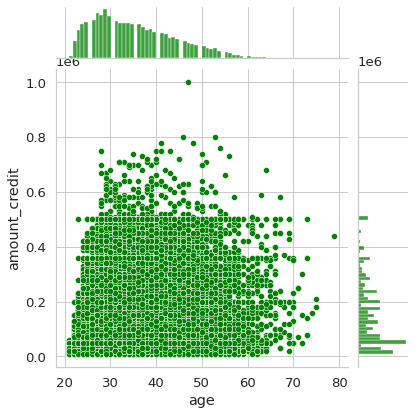

In [23]:
#Salgamos de dudas: que tan relacionada está la edad con el monto del crédito?
sns.jointplot(x ='age',color ='green', y ='amount_credit', data = Xc)

Las gráficas evidencian que no hay una marcada tendencia a un mayor monto por edad. Sin embargo, si se percibe que sobresalen los mayores montos de créditos entre los 25 y los 30 años. 

In [26]:
ndf.education.value_counts().sort_index()

0.0       14
1.0    10574
2.0    14010
3.0     4909
4.0      123
5.0      280
6.0       51
Name: education, dtype: int64

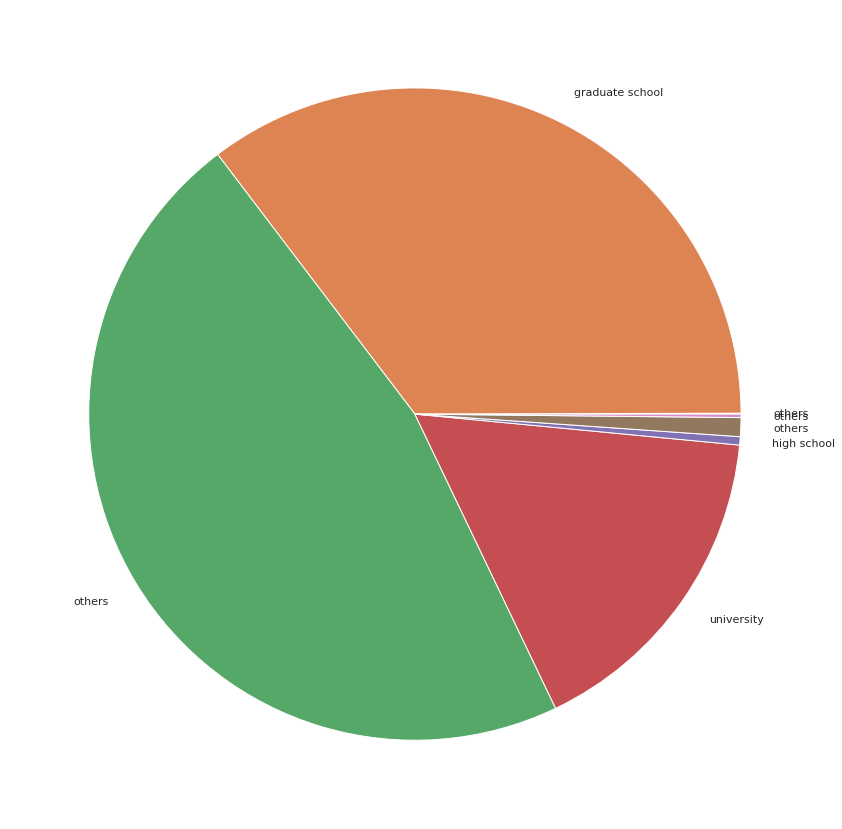

In [28]:
#Analicemos ahora con un pie chart el grado de escolaridad de los clientes de la entidad financiera

sns.set(rc = {'figure.figsize':(15,15)})

school_label = ['others', 'graduate school', 'others', 'university', 'high school', 'others', 'others'] 

#1 = graduate school; 2 = university; 3 = high school; 4 = others). 

plt.pie(np.array(ndf.education.value_counts().sort_index()), labels = school_label)
# show plot
plt.show()